<a href="https://colab.research.google.com/github/Aryanaut/eutro-reverso/blob/main/determine_concentration_by_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from spectral import *
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

Saving blobs.png to blobs.png
User uploaded file "blobs.png" with length 15733 bytes


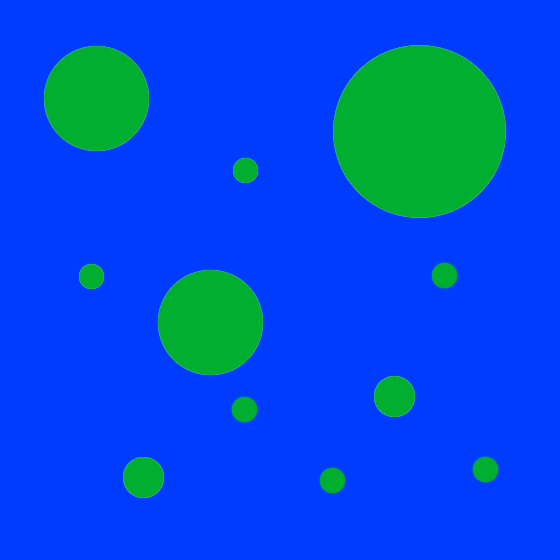

In [31]:
img = cv2.imread("blobs.png")
cv2_imshow(img)

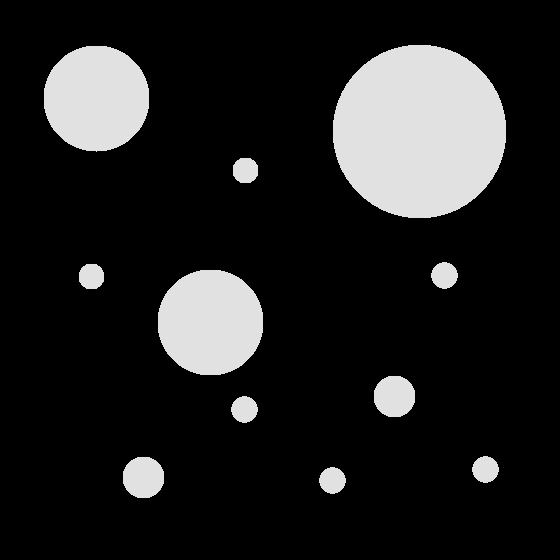

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thr = cv2.threshold(gray, 75, 225, cv2.THRESH_BINARY)
cv2_imshow(thr)

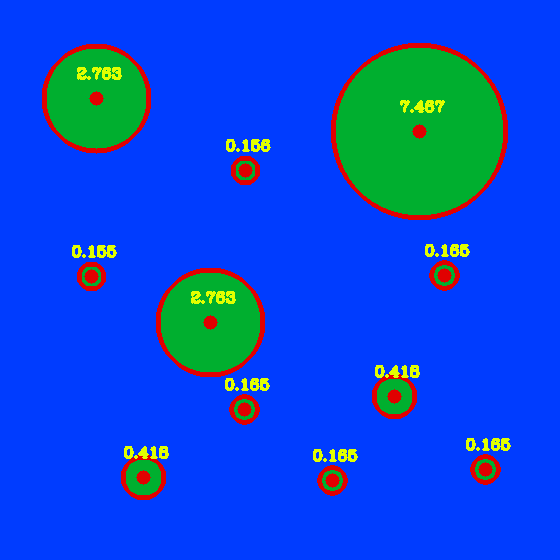

In [33]:
# detect contours 
area = img.shape[0] * img.shape[1]
contours, h = cv2.findContours(thr, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE) # finds all contours in the image
cv2.drawContours(img, contours, -1, color=(0, 0, 225), thickness=3) # draws all contours

# prints concentration by area of contour
for c in contours:
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  cv2.circle(img, (cX, cY), 7, (0, 0, 225), -1)
  cntArea = cv2.contourArea(c)
  conc = round((cntArea / area) * 100, 3)
  cv2.putText(img, str(conc), (cX-20, cY-20), 
              cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 225), 2)

cv2_imshow(img)